<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plot-of-all-parameters" data-toc-modified-id="Plot-of-all-parameters-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plot of all parameters</a></span></li><li><span><a href="#Fidelity-vs-parameters" data-toc-modified-id="Fidelity-vs-parameters-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fidelity vs parameters</a></span><ul class="toc-item"><li><span><a href="#Vary-all-parameters-together-(that-is,-study-fidelity-vs-$\Delta-t$)" data-toc-modified-id="Vary-all-parameters-together-(that-is,-study-fidelity-vs-$\Delta-t$)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Vary all parameters together (that is, study fidelity vs $\Delta t$)</a></span></li><li><span><a href="#Vary-single-parameters" data-toc-modified-id="Vary-single-parameters-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Vary single parameters</a></span></li></ul></li></ul></div>

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import glob
from IPython.display import display
from IPython.core.debugger import set_trace
from collections import OrderedDict
import itertools
import os
import sys
import pickle
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sympy
import pandas as pd

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

import cufflinks

import qutip
import theano
import theano.tensor as T

src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

import qubit_network.net_analysis_tools as nat
import qubit_network.utils
from qubit_network.utils import chop, complex2bigreal, bigreal2complex, bigreal2qobj
from qubit_network.QubitNetwork import pauli_product
from qubit_network.model import QubitNetworkGateModel
from qubit_network.Optimizer import Optimizer
from qubit_network.net_analysis_tools import NetDataFile, NetsDataFolder

In [16]:
net, _ = nat.load_network_from_file('../data/nets/qft_3q+5a_all.pickle')
fids = net.fidelity_test(n_samples=10000, return_mean=False)
# std_deviation = np.sqrt(np.sum((fids - fids.mean())**2) / (fids.shape[0] - 1))
pd.Series(fids).describe()

count    10000.000000
mean         0.994059
std          0.003097
min          0.978695
25%          0.992146
50%          0.994449
75%          0.996403
max          0.999703
dtype: float64

<IPython.core.display.Javascript object>


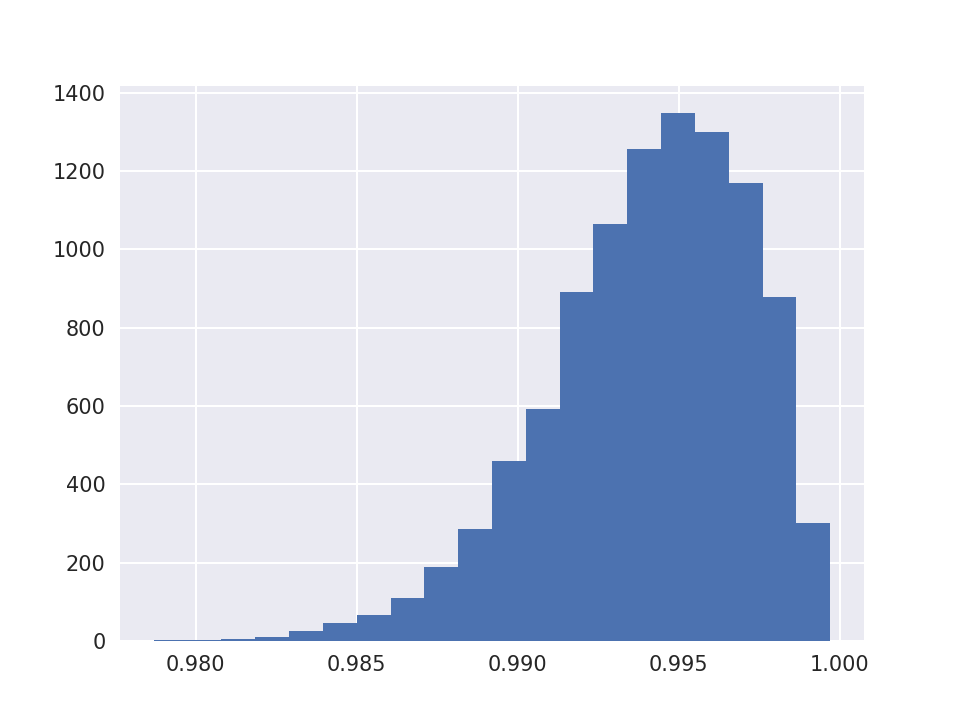

In [20]:
pd.Series(fids).hist(bins=20)

# Plot of all parameters

In [2]:
NetsDataFolder('../data/nets/').filter('qft_3q+5a*').plot_parameters(marker_size=4)

<IPython.core.display.Javascript object>


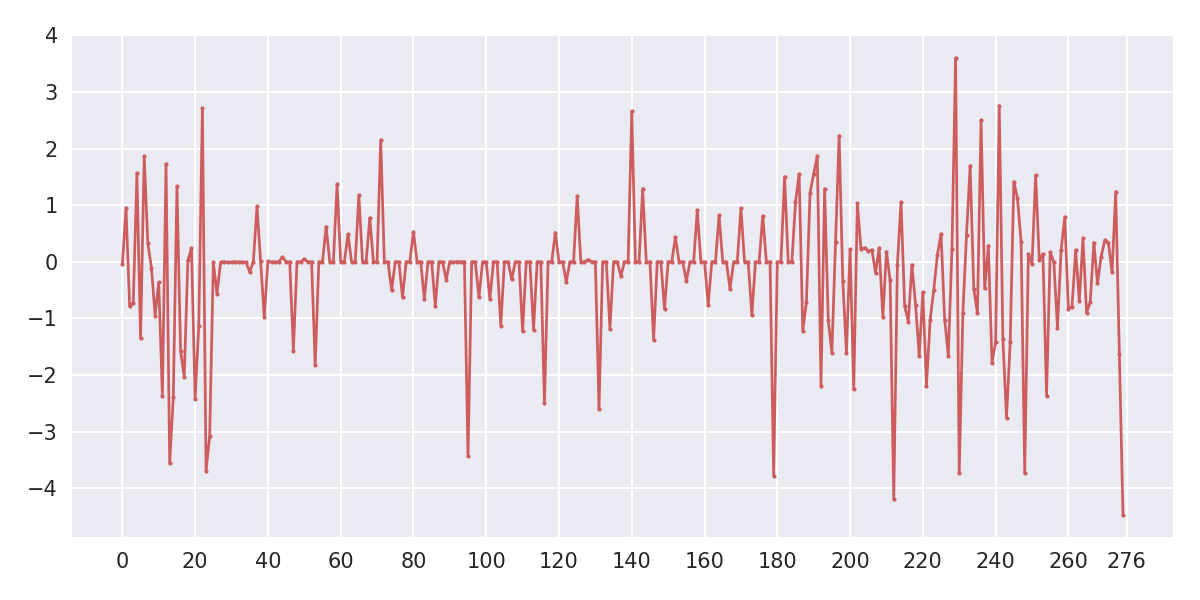

In [18]:
sns.set()
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

data = NetsDataFolder('../data/nets/').filter('qft_3q+5a*').view_parameters().values[:, 0]
# df.T.reset_index(drop=True).plot(ax=ax, marker='o', markersize=4., legend=False)
ax.plot(np.arange(data.shape[0]), data, 'o-', color='indianred', markersize=2, linewidth=1.3)

# ax.set_title('Different solutions for Toffoli with diagonal interactions', fontsize=16)
# ax.set_xlabel('Parameters', fontsize=14)
# ax.set_xlabel('')
# ax.set_ylabel('Values', fontsize=14)

# better range
# ax.set_xlim(-0.1 , 8.1)
# mathify xaxis labels
ax.set_xticks(np.concatenate([np.arange(0, data.shape[0], 20), [276]]))
# fix sizes
plt.tight_layout()
# save to file
fig.savefig('qft3q+5a_all.pdf', bbox_inches='tight')

# Fidelity vs parameters

## Vary all parameters together (that is, study fidelity vs $\Delta t$)

<IPython.core.display.Javascript object>


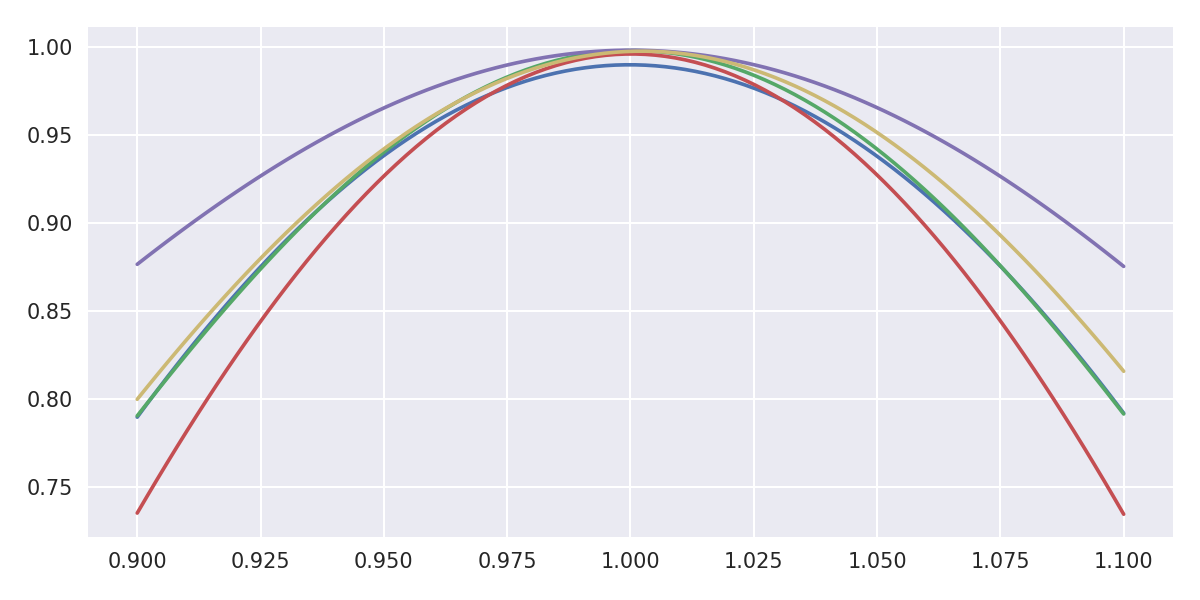

100% (100 of 100) |#######################| Elapsed Time: 0:00:31 Time: 0:00:31


In [23]:
net, _ = nat.load_network_from_file('../data/nets/qft_3q+5a_all.pickle')
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
nat.plot_fidelity_vs_J_qutip(net, xs=np.linspace(0.9, 1.1, 100), index_to_vary='all', ax=ax)
plt.tight_layout()
# fig.savefig('qft3q+5a_fidVStime.pdf', bbox_inches='tight')

<IPython.core.display.Javascript object>


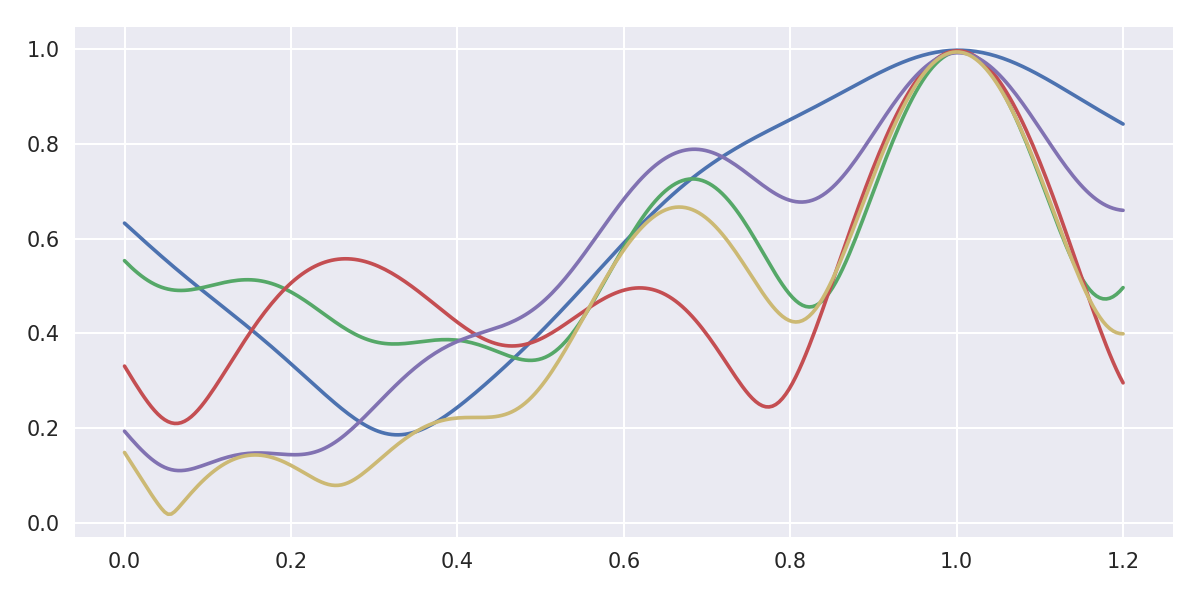

100% (300 of 300) |#######################| Elapsed Time: 0:01:19 Time: 0:01:19


In [19]:
net, _ = nat.load_network_from_file('../data/nets/qft_3q+5a_all.pickle')
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
nat.plot_fidelity_vs_J_qutip(net, xs=np.linspace(0, 1.2, 300), index_to_vary='all', ax=ax)
plt.tight_layout()
# fig.savefig('qft3q+5a_fidVStime_wide.pdf', bbox_inches='tight')

## Vary single parameters

<IPython.core.display.Javascript object>


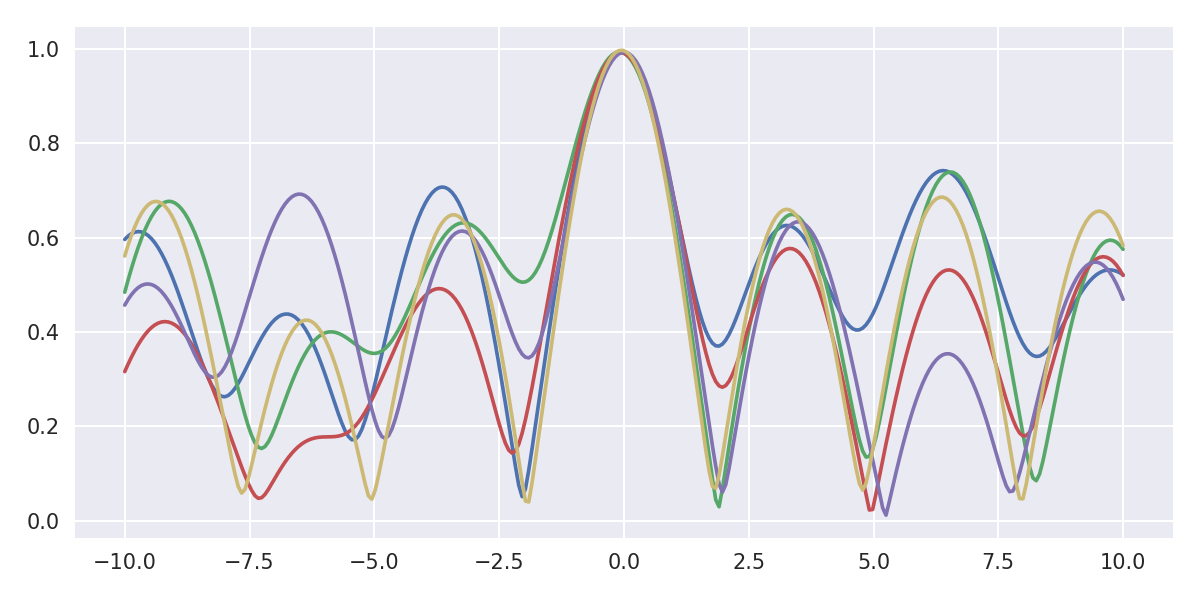

100% (300 of 300) |#######################| Elapsed Time: 0:01:15 Time: 0:01:15


In [12]:
net, _ = nat.load_network_from_file('../data/nets/qft_3q+5a_all.pickle')
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
nat.plot_fidelity_vs_J_qutip(net, xs=np.linspace(-10, 10, 300), index_to_vary=0, ax=ax)
plt.tight_layout()
# fig.savefig('qft3q+5a_fidVSpar1.pdf', bbox_inches='tight')

<IPython.core.display.Javascript object>


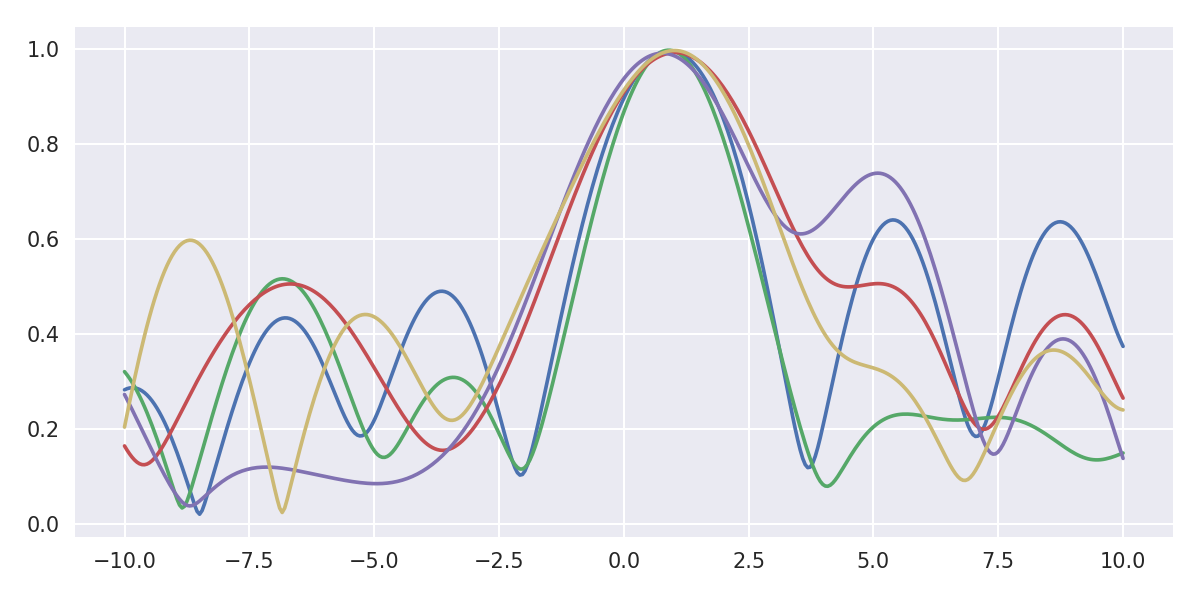

100% (400 of 400) |#######################| Elapsed Time: 0:01:44 Time: 0:01:44


In [16]:
net, _ = nat.load_network_from_file('../data/nets/qft_3q+5a_all.pickle')
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
nat.plot_fidelity_vs_J_qutip(net, xs=np.linspace(-10, 10, 400), index_to_vary=1, ax=ax)
plt.tight_layout()